### STOCK VOLATILITY PREDICTION USING GARCH

In [1]:
import pandas as pd 
import numpy as np 
import requests

##### Accessing APIs Through a URL

I'll extract stock market information from the [AlphaVantage](https://alphavantage.co/) API. To get a sense of how an API works, consider the URL below. Take a moment to read the text of the link itself, then click on it and examine the data that appears in your browser. What's the format of the data? What data is included? How is it organized? 

##### Demo API 

In [3]:
url = ("https://www.alphavantage.co/query?"
       "function=TIME_SERIES_DAILY&"
       "symbol=IBM&"
       "apikey=demo")

print("url type:", type(url))
url

url type: <class 'str'>


'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=IBM&apikey=demo'

Now that we have a sense of the components of URL that gets information from AlphaVantage, let's create our own for a different stock.

In [2]:
url = ("https://www.alphavantage.co/query?"
       "function=TIME_SERIES_DAILY&"
       "symbol=AMBUJACEM.BSE&"
       "apikey=demo")

print("url type:", type(url))
url

url type: <class 'str'>


'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=AMBUJACEM.BSE&apikey=demo'

Now that we've stored our API key, we need to import it into our code base. This is commonly done by creating a `config` module.

In [18]:
# Assuming this is your main script

from config import settings  # Assuming you've renamed config.py to your actual module name

# Access the settings
print(f"Alpha Vantage API Key: {settings.alpha_vantage_api_key}")
print(f"Database Name: {settings.db_name}")
print(f"Model Directory: {settings.model_directory}")

Alpha Vantage API Key: INCQJAFFKS1UL381
Database Name: stocks.sqlite
Model Directory: models


In [22]:
dir(settings)

['Config',
 '__abstractmethods__',
 '__annotations__',
 '__class__',
 '__class_getitem__',
 '__class_vars__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__fields__',
 '__fields_set__',
 '__format__',
 '__ge__',
 '__get_pydantic_core_schema__',
 '__get_pydantic_json_schema__',
 '__getattr__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__pretty__',
 '__private_attributes__',
 '__pydantic_complete__',
 '__pydantic_core_schema__',
 '__pydantic_custom_init__',
 '__pydantic_decorators__',
 '__pydantic_extra__',
 '__pydantic_fields_set__',
 '__pydantic_generic_metadata__',
 '__pydantic_init_subclass__',
 '__pydantic_parent_namespace__',
 '__pydantic_post_init__',
 '__pydantic_private__',
 '__pydantic_root_model__',
 '__pydantic_serializer__',
 '__pydantic_validator__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',

Now lets create a URL for "AMBUJACEM.BSE". This time, use the base URL `"https://learn-api.wqu.edu/1/data-services/alpha-vantage/query?"` and incorporate your API key.

In [24]:
url = ("https://www.alphavantage.co/query?"
       "function=TIME_SERIES_DAILY&"
       "symbol=AMBUJACEM.BSE&"
       f"apikey={settings.alpha_vantage_api_key}"
    )

print("url type:", type(url))
url

url type: <class 'str'>


'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=AMBUJACEM.BSE&apikey=INCQJAFFKS1UL381'

<a id="task-815">Go</a> to the documentation for the [AlphaVantage Time Series Daily API](https://www.alphavantage.co/documentation/#daily). Expand your URL to incorporate all the parameters listed in the documentation. Also, to make your URL more dynamic, create variable names for all the parameters that can be added to the URL.

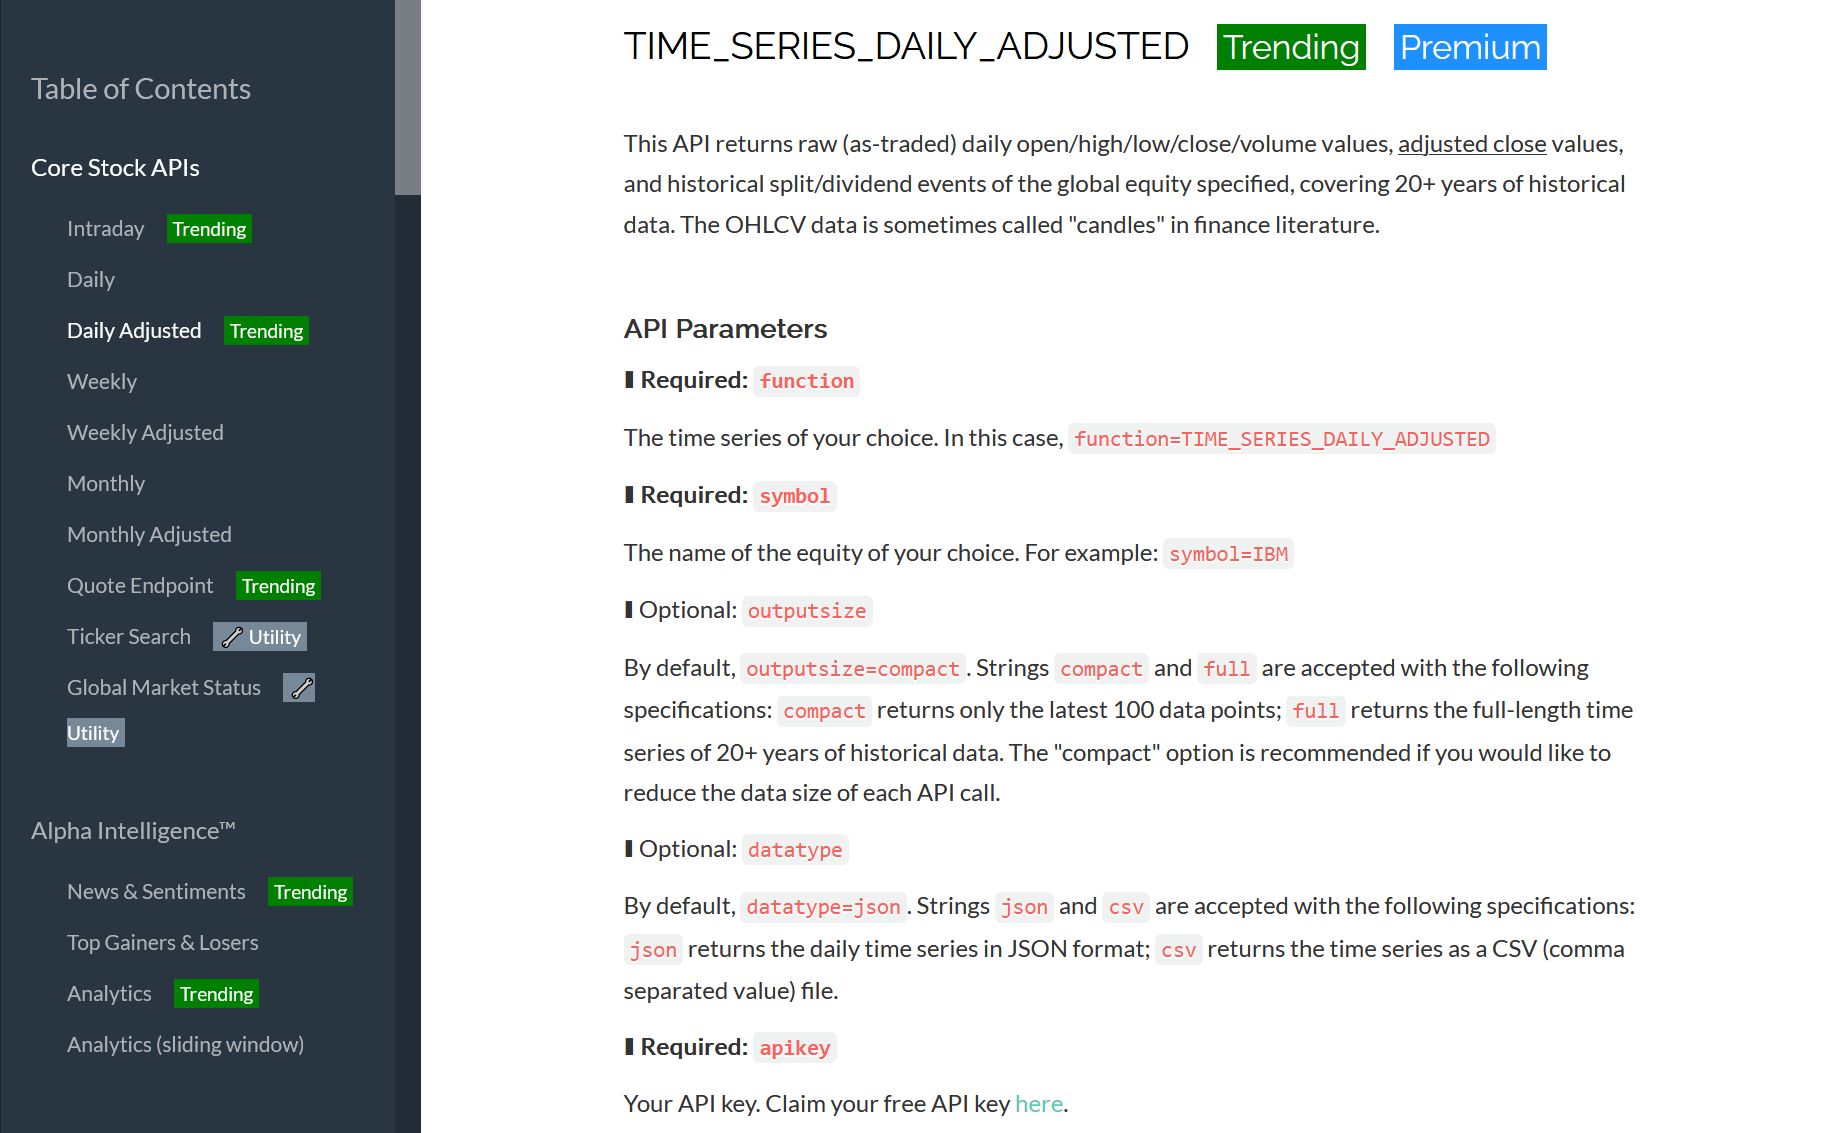

In [38]:
from IPython.display import Image, display
ROOT = os.getcwd()

image_path = os.path.join(ROOT, "stock.PNG")

# Display the image
display(Image(filename=image_path))


Now let's get a better view of our Data to be extracted by considering other Parameters

In [26]:
ticker = "AMBUJACEM.BSE"
output_size = "compact"
data_type = "json"

url = ("https://www.alphavantage.co/query?"
       "function=TIME_SERIES_DAILY&"
       f"symbol={ticker}&"
       f"outputsize={output_size}&"
       f"datatype={data_type}&"
       f"apikey={settings.alpha_vantage_api_key}"
    )

print("url type:", type(url))
url

url type: <class 'str'>


'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=AMBUJACEM.BSE&outputsize=compact&datatype=json&apikey=INCQJAFFKS1UL381'

Let's implement the above as a Function that takes in those parameters and return a url link

In [29]:
def alphavantage_url(ticker : str, output_size : str, data_type : str):
    base_url = "https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&"
    url = (base_url + f"symbol={ticker}&" + 
                f"outputsize={output_size}&" + f"datatype={data_type}&" +
                     f"apikey={settings.alpha_vantage_api_key}")  
    return url 

In [33]:
url = alphavantage_url("AMBUJACEM.BSE", "compact", "json")
url

'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=AMBUJACEM.BSE&outputsize=compact&datatype=json&apikey=INCQJAFFKS1UL381'

#### Accessing APIs Through a Request

In [34]:
response = requests.get(url=url)

In [35]:
print("response type:", type(response))

response type: <class 'requests.models.Response'>


In [36]:
dir(response)

['__attrs__',
 '__bool__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__nonzero__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_content',
 '_content_consumed',
 '_next',
 'apparent_encoding',
 'close',
 'connection',
 'content',
 'cookies',
 'elapsed',
 'encoding',
 'headers',
 'history',
 'is_permanent_redirect',
 'is_redirect',
 'iter_content',
 'iter_lines',
 'json',
 'links',
 'next',
 'ok',
 'raise_for_status',
 'raw',
 'reason',
 'request',
 'status_code',
 'text',
 'url']

In [37]:
response.status_code

200